In [14]:


import numpy as np
import itertools

sequence= ['A', 'B','C','D','E','F','G']
startindex= 3
i=startindex
counter=0
statement=True
experiments= 100
nmax=1000
datasave={}
datasave['all']=[]
datasave['episodes']={}
temp=[]
for expi in range(experiments):
    datasave['episodes'][expi]=[]
    for j in range(nmax):
        counter=0
        statement=True
        temp=[]
        i=startindex

        while statement==True:

            outcome=np.random.randint(0,2)
            if counter==0:
                datasave['all'].append(sequence[i])
                temp.append(sequence[i])

            if sequence[i]=='A' or sequence[i]=='G':
                statement=False

                break

            if outcome==0: #left
                i=i-1
            elif outcome==1:
                i=i+1 #right

            datasave['all'].append(sequence[i])
            temp.append(sequence[i])

            if counter>100:
                statement=False
                break

            counter=counter + 1

        datasave['episodes'][expi].append(temp)



    
    
    
    
    
    
        
            
        
    

In [20]:
import os
size_bytes = os.stat("Project1_new_RL.pynb").st_size

size_bytes

FileNotFoundError: [Errno 2] No such file or directory: 'Project1_new_RL.pynb'

In [18]:

#Sutton Algorithm 
import numpy as np
import pandas as pd
sequence= ['A', 'B','C','D','E','F','G']
sequence_noterminal= ['B','C','D','E','F']
np.random.seed(4)
nmax= 100
trueval= np.array([1/6, 1/3 , 1/2, 2/3, 5/6])
lambdas= np.arange(0,1.0,0.1)[1::]
lambdas= np.array([0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
alphas= np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6])
experiments=1
products= list(itertools.product(lambdas, alphas))
dicterror={}
dicterror['lambda']=[]
dicterror['alpha']=[]
dicterror['rmseavg']=[]
rmsebest=100000
rmse_avgbest= 100000
for prod in products:
    lambdai= prod[0]
    alpha= prod[1]  
    w_sum=np.zeros(7)
    rmse_sum=0
    for expi in range(experiments):
        for j,step in enumerate(datasave['episodes'][expi]):
            if j==0:
                w= np.zeros(len(sequence))

            eli= np.zeros(7)
            eli[3]=1
            data_episode=step
            tevent= len(data_episode)
            netw= np.zeros(7)
            for ti in range(tevent):
                xfuture=np.zeros(7)
                xpresent= np.zeros(7)
                index=sequence.index(data_episode[ti])
                xpresent[index]=1
                if ti<tevent-1 :
                    indexf=sequence.index(data_episode[ti+1])
                    xfuture[indexf]=1
                    termf= np.dot(w.T,xfuture)

                else: 
                    if data_episode[ti]=='G':
                        termf=1
                    else:
                        termf=0

                deltaw= alpha*(termf- np.dot(w.T,xpresent))*eli
                #deltaw= alpha*(termf  - np.dot(w.T,xpresent) + np.dot(w.T,xfuture))*eli,
                eli= eli*lambdai +  xfuture
                #eli= eli*lambdai +  xfuture,
                netw= netw + deltaw

            w=w + netw



        w_sum= w_sum + w
        rmse=np.sqrt(np.power(w[1]-trueval[0],2) + np.power(w[2]-trueval[1],2)  + 
                         np.power(w[3]-trueval[2],2) + 
                                 np.power(w[4]-trueval[3],2) +
                                np.power(w[5]-trueval[4],2 ))
        
        
        
        if rmse<rmsebest:
            rmsebest=rmse
            w_best=w
        
        rmse2=np.sqrt(((w[1:6] - trueval) ** 2).mean())
        rmse_sum=rmse_sum + rmse2
        
        
    w_avg= w_sum/experiments
    rmse_avg= rmse_sum/experiments
    dicterror['alpha'].append(alpha)
    dicterror['lambda'].append(lambdai)
    #dicterror['rmse'].append(rmse)
    dicterror['rmseavg'].append(rmse_avg)
    
print(w_best[1:6], "best")
print(w_avg[1:6], "Estimate avg")
##print(wbest[1:6], "\Estimate Sequentially\")
print(trueval, "true")
print(rmsebest, "RMSE")

aa=pd.DataFrame(dicterror)
aa.sort_values(by=['rmseavg'], inplace=True)
final= aa.groupby(['lambda']).first()

      
aa


[0.24117977 0.49360342 0.56826946 0.72475207 0.86592643] best
[1.19982822 6.04063468 0.53876764 0.78725394 1.00000001] Estimate avg
[0.16666667 0.33333333 0.5        0.66666667 0.83333333] true
0.20083736208250735 RMSE


,lambda,alpha,rmseavg
1,0.0,0.1,8.981720e-02
8,0.1,0.1,9.378642e-02
15,0.2,0.1,9.861193e-02
22,0.3,0.1,1.046056e-01
29,0.4,0.1,1.122711e-01
...,...,...,...
27,0.3,0.6,7.484769e+08
5,0.0,0.5,3.042026e+25
20,0.2,0.6,2.420865e+26
13,0.1,0.6,2.857062e+52


In [23]:
final

,alpha,rmseavg
lambda,,
0.0,0.1,0.089817
0.1,0.1,0.093786
0.2,0.1,0.098612
0.3,0.1,0.104606
0.4,0.1,0.112271
0.5,0.1,0.122387
0.6,0.1,0.136063
0.7,0.1,0.154818
0.8,0.1,0.181491


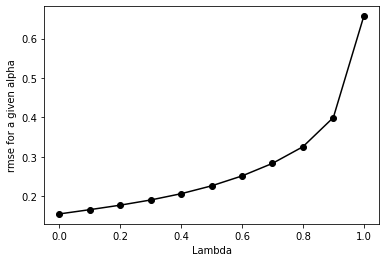

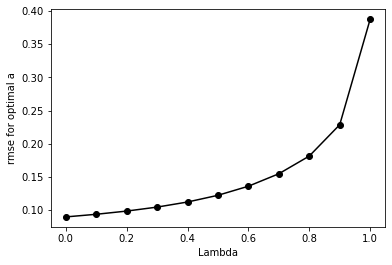

/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/var/folders/3l/yn2hqvzn44x1knqzb_2538xw0000gn/T/ipykernel_15527/3237212705.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


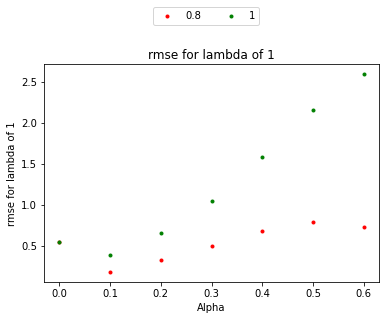

In [41]:

import numpy as np
import copy 
from matplotlib import pyplot as plt
aa2=copy.deepcopy(aa)
boola=aa2['alpha']==0.2
net=aa2[boola]
y=net['rmseavg'].to_numpy()
x=net['lambda']
plt.plot(x, y, '-ok');
plt.xlabel("Lambda")
plt.ylabel("rmse for a given alpha")
plt.show()
y=final['rmseavg'].to_numpy()
x=np.array(list(final.index))
plt.plot(x, y, '-ok');
plt.xlabel("Lambda")
plt.ylabel("rmse for optimal a")
plt.show()
lambdas=[0,0.3,0.8,1]
lambdas=[0.8,1]
colors= ['red', 'green', 'blue', 'brown']
fig, ax = plt.subplots()
for ii,lambdai in enumerate(lambdas):
    boola=aa2['lambda']==lambdai
    legendi= str(lambdai)
    netf=aa2[boola]
    netf.sort_values(by=['alpha'], inplace=True)
    y=netf['rmseavg'].to_numpy()
    x=netf['alpha']
    #plt.plot(x, y, '-ok')
    ax.scatter(x, y, color= colors[ii],label= legendi, marker='.')
    
    
    ax.set_xlabel("Alpha")
    ax.set_ylabel("rmse for lambda of {0}".format(lambdai))
    ax.set_title("rmse for lambda of {0}".format(lambdai))
    
    
fig.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3)
fig.show()




In [25]:
y

array([0.0898172 , 0.09378642, 0.09861193, 0.1046056 , 0.11227113,
       0.12238737, 0.13606346, 0.15481778, 0.18149081, 0.22866281,
       0.38750549])